<a href="https://colab.research.google.com/github/kyle-gao/GRSS_TrackMSD2021/blob/main/Kaggle_LCCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#kaggle dataset 
https://www.kaggle.com/ravi02516/satellite-change-detection?select=label2

In [1]:
import tensorflow as tf
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from google.colab import drive
import os
import shutil

In [79]:
drive.mount("/content/Drive",force_remount=True)

Mounted at /content/Drive


In [82]:
data_dir = "/content"
data_zip_dir = "/content/Drive/MyDrive/Kaggle_CoverChange.zip"

#if os.path.isdir(data_dir):
# shutil.rmtree(data_dir+"/Kaggle_CoverChange")

In [80]:
shutil.unpack_archive(data_zip_dir,data_dir)

In [87]:
im1 = tf.keras.preprocessing.image.load_img("/content/Kaggle_CoverChange/im1/00013.png")
im1 = tf.keras.preprocessing.image.img_to_array(im1) #(512,512,3) np.float32

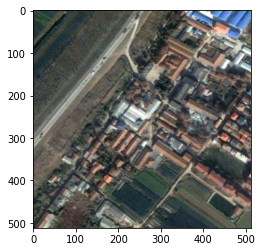

In [88]:
plt.imshow(im1/255)

In [89]:
lab1 = tf.keras.preprocessing.image.load_img("/content/Kaggle_CoverChange/label1/00013.png",grayscale=False)
lab1 = tf.keras.preprocessing.image.img_to_array(lab1) #(512,512,3) np.float32

In [90]:
np.unique(lab1)

array([  0., 128., 255.], dtype=float32)

In [91]:
lab1.shape

(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


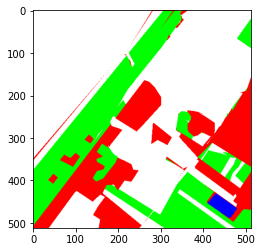

In [92]:
plt.imshow(lab1)

In [93]:
a = lab1[:,:,0]+lab1[:,:,1]*0.1+lab1[:,:,2]*0.01

In [94]:
np.unique(a)

array([  2.55,  12.8 ,  25.5 , 128.  , 142.08, 283.05], dtype=float32)

In [97]:
onebandl1 = tf.keras.preprocessing.image.load_img("/content/Kaggle_CoverChange/label1/00013.png",grayscale=True)
onebandl1 = tf.keras.preprocessing.image.img_to_array(onebandl1) #(512,512,3) np.float32

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


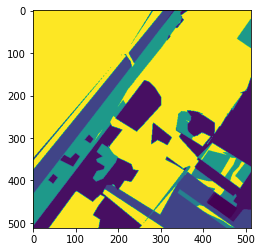

In [98]:
plt.imshow(onebandl1[:,:,0])

In [99]:
np.unique(onebandl1)

array([ 29.,  38.,  75., 128., 150., 255.], dtype=float32)

In [101]:
filenames = os.listdir("/content/Kaggle_CoverChange/im1")

In [102]:
data_dir = "/content/Kaggle_CoverChange"

In [108]:
data_dir+'/im1'+filenames[0]

'/content/Kaggle_CoverChange/im100424.png'

In [117]:
size = (224,224)

padding = 'VALID'


def deepglobe_write_tiles(filenames, data_dir, size=(224,224),padding='VALID',save_dir = "/content/Kaggle_Cover_Tiles/"):
  subdir = ["im1","im2","label1","label2"]
  for dir in subdir:
    os.mkdir(os.path.join(data_dir,dir))
  
  for f in filenames:
    image1_fn = data_dir+'/im1'+f
    label1_fn = data_dir+'/label1'+f

    image2_fn = data_dir+'/im2'+f
    label2_fn = data_dir+'/label2'+f

    image1 = tf.keras.preprocessing.image.load_img(image1_fn)
    image1 = tf.keras.preprocessing.image.img_to_array(image1)

    image2 = tf.keras.preprocessing.image.load_img(image2_fn)
    image2 = tf.keras.preprocessing.image.img_to_array(image2)
    #(H,W,3)
    label1 = tf.keras.preprocessing.image.load_img(label1_fn)
    label1 = tf.keras.preprocessing.image.img_to_array(label1)

    label2 = tf.keras.preprocessing.image.load_img(label2_fn)
    label2 = tf.keras.preprocessing.image.img_to_array(label2)
    #(H,W,1)

    """ - do this step in preprocessing instead since the encoding rescales everything to 255
    #binarization
    label [label >= 128] = 255
    label[label < 128] = 0

    labelnew = label[:,:,0]+0.1*label[:,:,1]+0.01*label[:,:,2] #contracts the last dimension without losing class information

    class_dict = {(25.5+2.55):0, (255+25.5):1, (255+2.55):2,(25.5):3,2.55:4,(255+25.5+2.55):5,0:6}
    labelnew = to_categorical(labelnew,class_dict) #(H,W) """
    
    
    image1 = tf.expand_dims(image1,axis=0)
    image1_tiles =  tf.image.extract_patches(images=image1,
                           sizes=[1,h, w, 1],
                           strides=[1,h, w, 1],
                           rates=[1, 1, 1, 1],
                           padding=padding)
    image1_tiles = tf.reshape(image1_tiles, [-1,h,w,3])

    image2 = tf.expand_dims(image2,axis=0)
    image2_tiles =  tf.image.extract_patches(images=image2,
                           sizes=[1,h, w, 1],
                           strides=[1,h, w, 1],
                           rates=[1, 1, 1, 1],
                           padding=padding)
    image2_tiles = tf.reshape(image2_tiles, [-1,h,w,3])
  
    #label = tf.expand_dims(labelnew,axis=-1)
    label1 = tf.expand_dims(label1,axis=0)
    label1_tiles =  tf.image.extract_patches(images=label1,
                           sizes=[1,h, w, 1],
                           strides=[1,h, w, 1],
                           rates=[1, 1, 1, 1],
                           padding=padding)
    label1_tiles = tf.reshape(label1_tiles, [-1,h,w,1])

    label2 = tf.expand_dims(label2,axis=0)
    label2_tiles =  tf.image.extract_patches(images=label2,
                           sizes=[1,h, w, 1],
                           strides=[1,h, w, 1],
                           rates=[1, 1, 1, 1],
                           padding=padding)
    label2_tiles = tf.reshape(label2_tiles, [-1,h,w,1])

    if not(os.path.isdir(save_dir)):
      os.mkdir(save_dir)


    for i in range(label1_tiles.shape[0]):

      im1 = save_dir+"\im1"+f
      im2 = save_dir+"\im2"+f
      lb1 = save_dir+"\label1"+f
      lb2 = save_dir+"\label2"+f

      tf.keras.preprocessing.image.save_img(im1,image1_tiles[i,:,:,:])
      tf.keras.preprocessing.image.save_img(im2,image2_tiles[i,:,:,:])

      tf.keras.preprocessing.image.save_img(lb1,label1_tiles[i,:,:,:])
      tf.keras.preprocessing.image.save_img(lb2,label2_tiles[i,:,:,:])



    print(image_fn)

In [112]:
subdir = ["im1","im2","label1","label2"]

In [114]:
for i in subdir:
  print(os.path.join(data_dir,i))

/content/Kaggle_CoverChange/im1
/content/Kaggle_CoverChange/im2
/content/Kaggle_CoverChange/label1
/content/Kaggle_CoverChange/label2
